* Öncelikle, Sıcaklık verilerini Kaggle'dan indirin.  
* Hedef değişkenin sıcaklık olduğu bir regresyon modeli oluşturun. Açıklayıcı değişkenler olarak nem, rüzgar hızı, rüzgar ve basınç kullanın. OLS kullanarak modeli tahmin edin.  
* Şimdi, modelinizin yukarıdaki Gauss-Markov Koşullarını karşılayıp karşılamadığını kontrol edin. Eğer bazı varsayımlar karşılanmazsa, modelinizin doğruluğu için ihlallerin etkilerini tartışın.  

In [2]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
weather = pd.read_csv('./datasets/weatherHistory.csv')
weather.head(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


In [4]:
weather.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [5]:
weather.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature (C),96453.0,11.932678,9.551546,-21.822222,4.688889,12.0000,18.838889,39.905556
Apparent Temperature (C),96453.0,10.855029,10.696847,-27.716667,2.311111,12.0000,18.838889,39.344444
Humidity,96453.0,0.734899,0.195473,0.000000,0.600000,0.7800,0.890000,1.000000
Wind Speed (km/h),96453.0,10.810640,6.913571,0.000000,5.828200,9.9659,14.135800,63.852600
Wind Bearing (degrees),96453.0,187.509232,107.383428,0.000000,116.000000,180.0000,290.000000,359.000000
Visibility (km),96453.0,10.347325,4.192123,0.000000,8.339800,10.0464,14.812000,16.100000
Loud Cover,96453.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
Pressure (millibars),96453.0,1003.235956,116.969906,0.000000,1011.900000,1016.4500,1021.090000,1046.380000


In [6]:
Y = weather['Temperature (C)']
X = weather[['Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Pressure (millibars)']]

lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [-3.24962454e+01 -2.01413742e-01  4.04836936e-03 -6.91759209e-04]
Sabit değer (bias): 
 37.92643818528524


In [7]:
import statsmodels.api as sm
Y = weather['Temperature (C)']
X = weather[['Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Pressure (millibars)']]

X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Temperature (C)   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                 1.750e+04
Date:                Mon, 30 Dec 2019   Prob (F-statistic):               0.00
Time:                        09:58:16   Log-Likelihood:            -3.2821e+05
No. Observations:               96453   AIC:                         6.564e+05
Df Residuals:                   96448   BIC:                         6.565e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     37.9264      0.233    162.709      0.000      37.470      38.383
Humidity                 -32.4962      0.123   -264.288      0.000     -32.737     -32.255
Wind Speed (km/h)         -0.2014      0.003    -57.557      0.000      -0.208      -0.195
Wind Bearing (degrees)     0.0040      0.000     18.463      0.000       0.004       0.004
Pressure (millibars)      -0.0007      0.000     -3.452      0.001      -0.001      -0.000
==============================================================================
Omnibus:                     3375.432   Durbin-Watson:                   0.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3793.297
Skew:                          -0.455   Prob(JB):                         0.00
Kurtosis:                       3.339   Cond. No.                     1.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
X2 = X.copy()
del X2['const']
Formül = ''

col_names = X2.columns.tolist()
for m, i in enumerate(col_names, start=0):
    #print(i)
    #print(lrm.coef_[m])
    Formül=Formül+ '('+str(lrm.coef_[m])+' * '+i+') + '

Formül='Temperature (C) = '+str(lrm.intercept_)+' + '+Formül+' '+str(X['const'][0])
Formül

'Temperature (C) = 37.92643818528524 + (-32.49624543360848 * Humidity) + (-0.2014137423917995 * Wind Speed (km/h)) + (0.004048369358783159 * Wind Bearing (degrees)) + (-0.0006917592093884928 * Pressure (millibars)) +  1.0'

In [9]:
weather['Y'] = 37.92643818528524 + (-32.49624543360848 * weather['Humidity']) + (-0.2014137423917995 * weather['Wind Speed (km/h)']) + (0.004048369358783159 * weather['Wind Bearing (degrees)']) + (-0.0006917592093884928 * weather['Pressure (millibars)']) + 1.0

lrm_ornek = linear_model.LinearRegression()
lrm_ornek.fit(weather[["Humidity","Wind Speed (km/h)","Wind Bearing (degrees)","Pressure (millibars)"]], weather["Temperature (C)"])

tahmin = lrm_ornek.predict(weather[["Humidity","Wind Speed (km/h)","Wind Bearing (degrees)","Pressure (millibars)"]])

print('Değişkenler: \n', lrm_ornek.coef_)
print('Sabit değer (bias): \n', lrm_ornek.intercept_)

Değişkenler: 
 [-3.24962454e+01 -2.01413742e-01  4.04836936e-03 -6.91759209e-04]
Sabit değer (bias): 
 37.92643818528524


**Varsayım 1: Katsayılarda modelin doğrusallığı:**

In [10]:
baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }

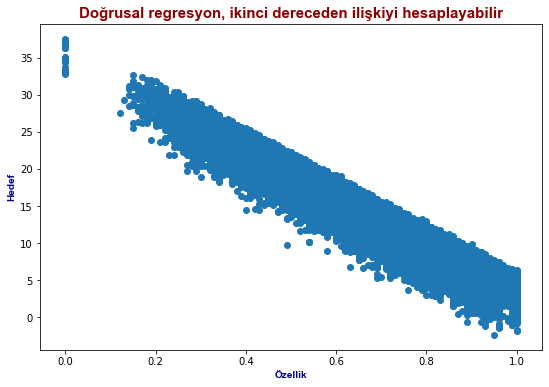

In [11]:
plt.figure(figsize=(9,6))
plt.scatter(weather["Humidity"], tahmin)
plt.xlabel("Özellik", fontdict=eksen_font)
plt.ylabel("Hedef", fontdict=eksen_font)
plt.title('Doğrusal regresyon, ikinci dereceden ilişkiyi hesaplayabilir', fontdict=baslik_font)
plt.show()

*Parametreler doğrusaldır.*

**Varsayım 2: Hata terimi ortalamada sıfır olmalıdır**

In [12]:
hatalar = tahmin - weather["Temperature (C)"]
print("Sıcaklık Tahmin Modelinin ortalama hatası : {:.18f}".format(np.mean(hatalar)))

Sıcaklık Tahmin Modelinin ortalama hatası : -0.000000000000006223


*Modelin hatalarının ortalaması sıfırdır.*

**Varsayım 3: homoscedasticity**

In [13]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(tahmin, hatalar)
lev_stats = levene(tahmin, hatalar)

print("Bartlett test değeri : {0:3g} ve p değeri : {1:.21f}".format(bart_stats[0], bart_stats[1]))
print("Levene test değeri   : {0:3g} ve p değeri : {1:.21f}".format(lev_stats[0], lev_stats[1]))

Bartlett test değeri : 2464.84 ve p değeri : 0.000000000000000000000
Levene test değeri   : 2321.24 ve p değeri : 0.000000000000000000000


*Her iki testin p değerleri 0.05'ten düşüktür. Dolayısıyla, test sonuçları null hipotezini reddeder, bu da hatalarımızın heteroscedastic olduğu anlamına gelir.*

**Varsayım 4: düşük çoklu doğrusallık/low multicollinearity**

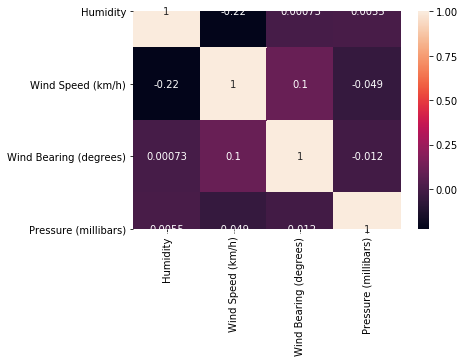

In [14]:
weather2 = weather[['Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Pressure (millibars)']].copy()
weather_corr = weather2.corr()

#plt.figure(figsize=(9,6))
sns.heatmap(weather_corr, annot=True)
plt.show()

*Yüksek bir korrelasyon bulunmamaktadır.*

**Varsayım 5: hata terimleri birbiriyle ilişkisiz olmalıdır**

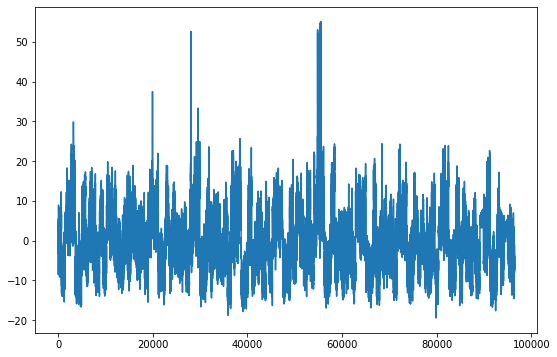

In [15]:
plt.figure(figsize=(9,6))
plt.plot(hatalar)
plt.show()

*Modelimizin hata koşullarının birbiriyle korele olmadığı görülmektedir.*

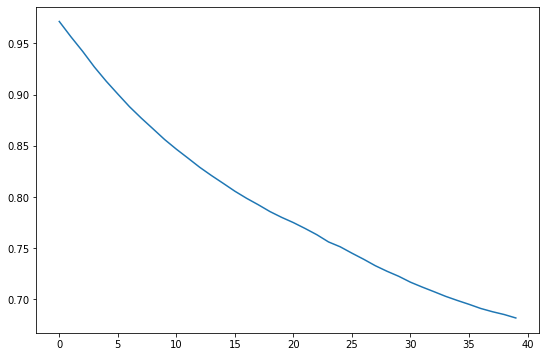

In [47]:
from statsmodels.tsa.stattools import acf

acf_data = acf(hatalar)

plt.figure(figsize=(9,6))
plt.plot(acf_data[1:])
plt.show()

**Varsayım 6: özellikler hatalarla korele olmamalıdır**

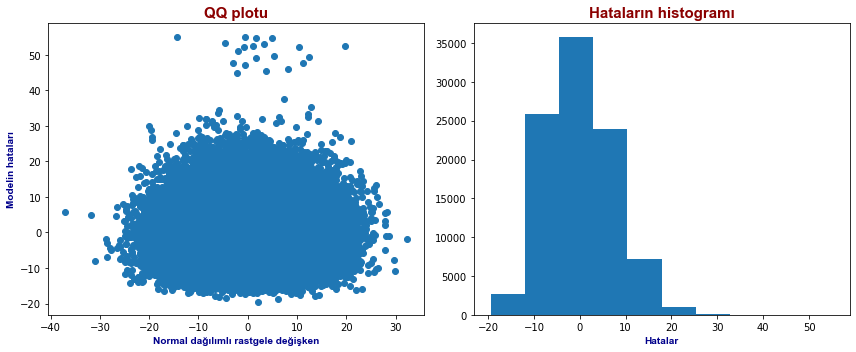

In [16]:
rand_nums = np.random.normal(np.mean(hatalar), np.std(hatalar), len(hatalar))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(rand_nums, hatalar)
plt.xlabel("Normal dağılımlı rastgele değişken", fontdict=eksen_font)
plt.ylabel("Modelin hataları", fontdict=eksen_font)
plt.title("QQ plotu", fontdict=baslik_font)

plt.subplot(1,2,2)
plt.hist(hatalar)
plt.xlabel("Hatalar", fontdict=eksen_font)
plt.title("Hataların histogramı", fontdict=baslik_font)

plt.tight_layout()
plt.show()

In [17]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(hatalar)
norm_stats = normaltest(hatalar)

print("Jarque-Bera test değeri : {0} ve p değeri : {1}".format(jb_stats[0], jb_stats[1]))
print("Normal test değeri      : {0}  ve p değeri : {1:.30f}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test değeri : 3793.2967352523433 ve p değeri : 0.0
Normal test değeri      : 3375.4323076995674  ve p değeri : 0.000000000000000000000000000000


*Her iki testin p-değerleri, hatalarımızın normal olarak dağılmadığını gösterir.*

**2. Ev fiyatları**

Ev Fiyatları verilerini Kaggle'dan indirin.  
Önceki derste oluşturduğunuz modeli yeniden gerçekleştirin.  
Yukarıdaki tüm varsayımları kontrol edin ve bazı varsayımların karşılanmadığı durumlarda sonuçları tartışın. 

In [18]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [19]:
ev_fiyat = pd.read_csv('./datasets/ev_fiyatlari.csv')
ev_fiyat.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [20]:
ev_fiyat_nulls = ev_fiyat.isnull().sum().to_frame('nulls')
ev_fiyat_nulls[ev_fiyat_nulls["nulls"]> 0]

,nulls
LotFrontage,259
Alley,1369
MasVnrType,8
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


**Null Kayıtların Temizlenmesi:**

In [21]:
# Basement parameters
ev_fiyat.BsmtQual.fillna("NA", inplace = True)
ev_fiyat.BsmtCond.fillna("NA", inplace = True)
ev_fiyat.BsmtExposure.fillna("NA", inplace = True)
ev_fiyat.BsmtFinType1.fillna("NA", inplace = True)
ev_fiyat.BsmtFinType2.fillna("NA", inplace = True)

# Garage Parameters
ev_fiyat.GarageType.fillna("NA", inplace = True)
ev_fiyat.GarageYrBlt.fillna("NA", inplace = True)
ev_fiyat.GarageFinish.fillna("NA", inplace = True)
ev_fiyat.GarageQual.fillna("NA", inplace = True)
ev_fiyat.GarageCond.fillna("NA", inplace = True)


#LotFrontage Parameter
ev_fiyat.LotFrontage.fillna(ev_fiyat.LotFrontage.mean(), inplace = True)

#Alley Parameter
ev_fiyat.Alley.fillna("NA", inplace = True)

#MasVnrType Parameter
ev_fiyat.MasVnrType.fillna("None", inplace = True)

#MasVnrArea Parameter
ev_fiyat.MasVnrArea.fillna(0.0, inplace = True)

#Electrical Parameter
ev_fiyat.Electrical.fillna(ev_fiyat.Electrical.value_counts().index[0], inplace = True) 

#FireplaceQu Parameter
ev_fiyat.FireplaceQu.fillna("NA", inplace = True)

#PoolQC Parameter
ev_fiyat.PoolQC.fillna("NA", inplace = True)

#Fence
ev_fiyat.Fence.fillna("NA", inplace = True)

#MiscFeature
ev_fiyat.MiscFeature.fillna("NA", inplace = True)

**Kategorik Değerlerin LabelEncoder & OneHotEncoder yöntemiyle Dönüştürülmesi:**

In [22]:
del ev_fiyat['GarageYrBlt']
categorical_feature_mask = ev_fiyat.dtypes==object
categorical_cols = ev_fiyat.columns[categorical_feature_mask].tolist()

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [24]:
ev_fiyat[categorical_cols] = ev_fiyat[categorical_cols].apply(lambda col: le.fit_transform(col))
ev_fiyat[categorical_cols].head(10)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,3,1,1,3,3,0,4,0,5,2,...,1,2,5,5,2,3,4,1,8,4
1,3,1,1,3,3,0,2,0,24,1,...,1,2,5,5,2,3,4,1,8,4
2,3,1,1,0,3,0,4,0,5,2,...,1,2,5,5,2,3,4,1,8,4
3,3,1,1,0,3,0,0,0,6,2,...,5,3,5,5,2,3,4,1,8,0
4,3,1,1,0,3,0,2,0,15,2,...,1,2,5,5,2,3,4,1,8,4
5,3,1,1,0,3,0,4,0,11,2,...,1,3,5,5,2,3,2,3,8,4
6,3,1,1,3,3,0,4,0,21,2,...,1,2,5,5,2,3,4,1,8,4
7,3,1,1,0,3,0,0,0,14,4,...,1,2,5,5,2,3,4,3,8,4
8,4,1,1,3,3,0,4,0,17,0,...,5,3,1,5,2,3,4,1,8,0
9,3,1,1,3,3,0,0,0,3,0,...,1,2,2,5,2,3,4,1,8,4


**Regression Modeli:**

In [25]:
Y = ev_fiyat['SalePrice']
X = ev_fiyat[['CentralAir','Electrical','ExterQual','Street','OverallQual', 
                  'YearRemodAdd', 'Fireplaces','TotalBsmtSF']]

lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [  3509.99504984    395.50774001 -20820.09002268  21331.38663336
  25393.19795423    347.10120066  20659.06853358     37.7282137 ]
Sabit değer (bias): 
 -688572.7607308154


In [26]:
import statsmodels.api as sm

X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     471.1
Date:                Mon, 30 Dec 2019   Prob (F-statistic):               0.00
Time:                        10:17:21   Log-Likelihood:                -17609.
No. Observations:                1460   AIC:                         3.524e+04
Df Residuals:                    1451   BIC:                         3.528e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -6.886e+05   1.36e+05     -5.069      0.000   -9.55e+05   -4.22e+05
CentralAir    3509.9950   4940.227      0.710      0.478   -6180.756    1.32e+04
Electrical     395.5077   1148.661      0.344      0.731   -1857.706    2648.722
ExterQual    -2.082e+04   2173.451     -9.579      0.000   -2.51e+04   -1.66e+04
Street        2.133e+04   1.74e+04      1.227      0.220   -1.28e+04    5.54e+04
OverallQual   2.539e+04   1249.241     20.327      0.000    2.29e+04    2.78e+04
YearRemodAdd   347.1012     69.447      4.998      0.000     210.873     483.329
Fireplaces    2.066e+04   1914.998     10.788      0.000    1.69e+04    2.44e+04
TotalBsmtSF     37.7282      3.071     12.284      0.000      31.703      43.753
==============================================================================
Omnibus:                      530.775   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20278.056
Skew:                           0.993   Prob(JB):                         0.00
Kurtosis:                      21.149   Cond. No.                     2.79e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.79e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
lrm_ornek = linear_model.LinearRegression()
lrm_ornek.fit(ev_fiyat[['CentralAir','Electrical','ExterQual','Street','OverallQual', 
                  'YearRemodAdd', 'Fireplaces','TotalBsmtSF']], ev_fiyat['SalePrice'])

tahmin = lrm_ornek.predict(ev_fiyat[['CentralAir','Electrical','ExterQual','Street','OverallQual', 
                  'YearRemodAdd', 'Fireplaces','TotalBsmtSF']])

print('Değişkenler: \n', lrm_ornek.coef_)
print('Sabit değer (bias): \n', lrm_ornek.intercept_)

Değişkenler: 
 [  3509.99504984    395.50774001 -20820.09002268  21331.38663336
  25393.19795423    347.10120066  20659.06853358     37.7282137 ]
Sabit değer (bias): 
 -688572.7607308154


**Varsayım 1: Katsayılarda modelin doğrusallığı:**

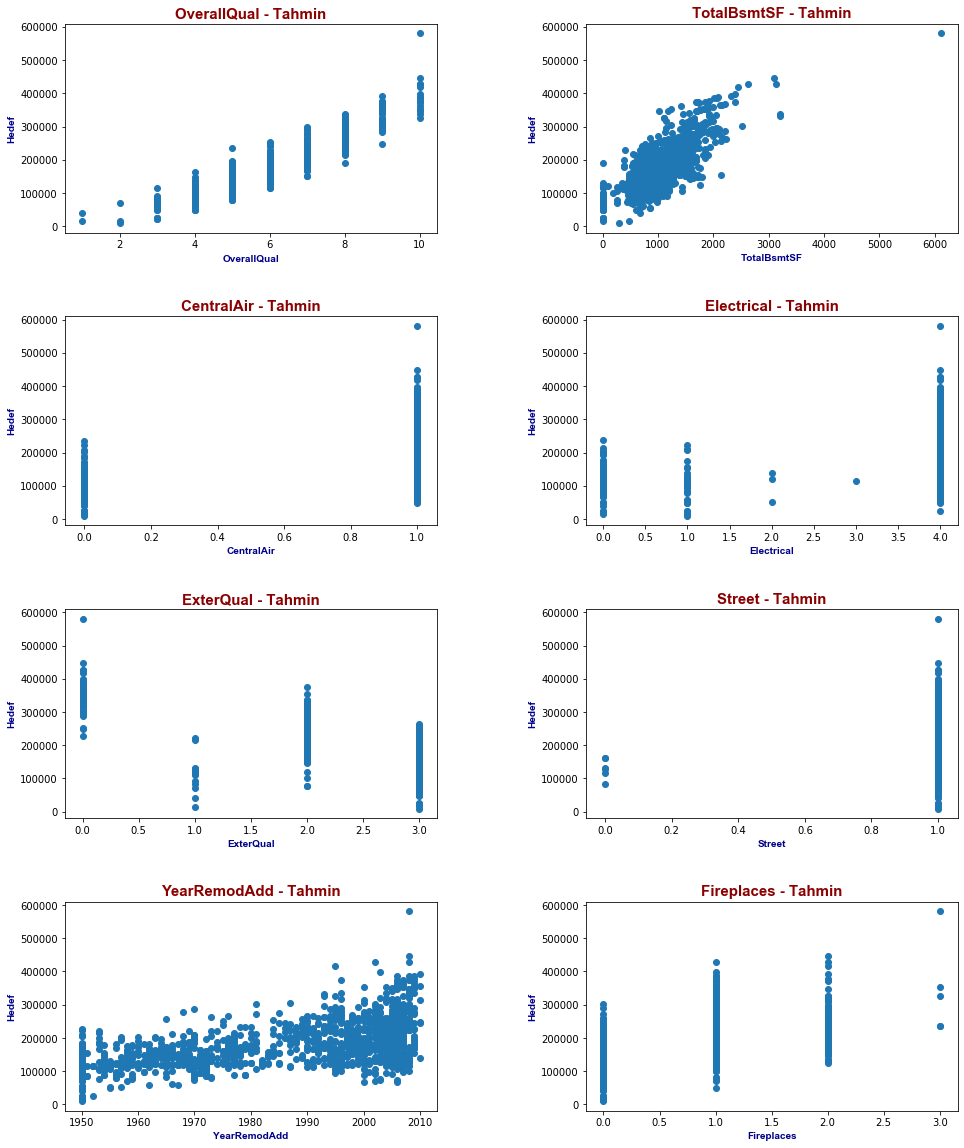

In [41]:
#plt.figure(figsize=(9,6))

fig = plt.figure(figsize=(16,20))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

plt.subplot(4, 2, 1)
plt.scatter(ev_fiyat["OverallQual"], tahmin)
plt.xlabel("OverallQual", fontdict=eksen_font)
plt.ylabel("Hedef", fontdict=eksen_font)
plt.title('OverallQual - Tahmin', fontdict=baslik_font)
plt.subplot(4, 2, 2)
plt.scatter(ev_fiyat["TotalBsmtSF"], tahmin)
plt.xlabel("TotalBsmtSF", fontdict=eksen_font)
plt.ylabel("Hedef", fontdict=eksen_font)
plt.title('TotalBsmtSF - Tahmin', fontdict=baslik_font)
plt.subplot(4, 2, 3)
plt.scatter(ev_fiyat["CentralAir"], tahmin)
plt.xlabel("CentralAir", fontdict=eksen_font)
plt.ylabel("Hedef", fontdict=eksen_font)
plt.title('CentralAir - Tahmin', fontdict=baslik_font)
plt.subplot(4, 2, 4)
plt.scatter(ev_fiyat["Electrical"], tahmin)
plt.xlabel("Electrical", fontdict=eksen_font)
plt.ylabel("Hedef", fontdict=eksen_font)
plt.title('Electrical - Tahmin', fontdict=baslik_font)
plt.subplot(4, 2, 5)
plt.scatter(ev_fiyat["ExterQual"], tahmin)
plt.xlabel("ExterQual", fontdict=eksen_font)
plt.ylabel("Hedef", fontdict=eksen_font)
plt.title('ExterQual - Tahmin', fontdict=baslik_font)
plt.subplot(4, 2, 6)
plt.scatter(ev_fiyat["Street"], tahmin)
plt.xlabel("Street", fontdict=eksen_font)
plt.ylabel("Hedef", fontdict=eksen_font)
plt.title('Street - Tahmin', fontdict=baslik_font)
plt.subplot(4, 2, 7)
plt.scatter(ev_fiyat["YearRemodAdd"], tahmin)
plt.xlabel("YearRemodAdd", fontdict=eksen_font)
plt.ylabel("Hedef", fontdict=eksen_font)
plt.title('YearRemodAdd - Tahmin', fontdict=baslik_font)
plt.subplot(4, 2, 8)
plt.scatter(ev_fiyat["Fireplaces"], tahmin)
plt.xlabel("Fireplaces", fontdict=eksen_font)
plt.ylabel("Hedef", fontdict=eksen_font)
plt.title('Fireplaces - Tahmin', fontdict=baslik_font)

plt.show()

*Modelimiz doğrudaldır.*

**Varsayım 2: Hata terimi ortalamada sıfır olmalıdır.**

In [42]:
hatalar = tahmin - ev_fiyat['SalePrice']
print("Ev Fiyat Tahmin Modelinin ortalama hatası : {:.18f}".format(np.mean(hatalar)))

Ev Fiyat Tahmin Modelinin ortalama hatası : 0.000000000046167446


*Hata terimi ortalamada sıfırdır.*

**Varsayım 3: homoscedasticity:**

In [43]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(tahmin, hatalar)
lev_stats = levene(tahmin, hatalar)

print("Bartlett test değeri : {0:3g} ve p değeri : {1:.21f}".format(bart_stats[0], bart_stats[1]))
print("Levene test değeri   : {0:3g} ve p değeri : {1:.21f}".format(lev_stats[0], lev_stats[1]))

Bartlett test değeri : 320.355 ve p değeri : 0.000000000000000000000
Levene test değeri   : 337.185 ve p değeri : 0.000000000000000000000


*Her iki testin p değerleri 0.05'ten düşüktür. Dolayısıyla, test sonuçları null hipotezini reddeder, bu da hatalarımızın heteroscedastic olduğu anlamına gelir.*

**Varsayım 4: düşük çoklu doğrusallık/low multicollinearity:**

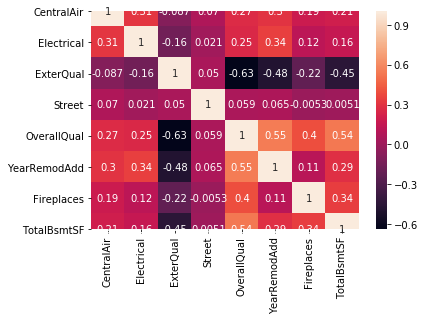

In [44]:
ev_fiyat2 = ev_fiyat[['CentralAir','Electrical','ExterQual','Street','OverallQual', 
                  'YearRemodAdd', 'Fireplaces','TotalBsmtSF']].copy()
ev_fiyat_corr = ev_fiyat2.corr()

#plt.figure(figsize=(9,6))
sns.heatmap(ev_fiyat_corr, annot=True)
plt.show()

*Yüksek bir korrelasyon bulunmamaktadır.*

**Varsayım 5: hata terimleri birbiriyle ilişkisiz olmalıdır**

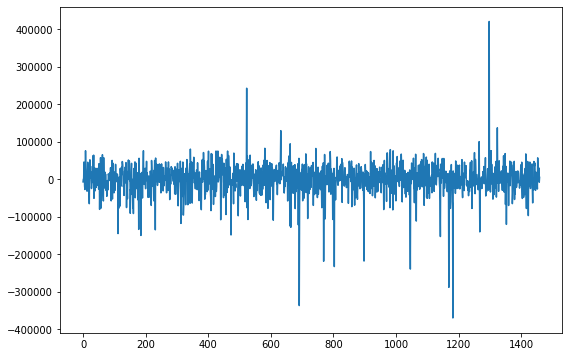

In [45]:
plt.figure(figsize=(9,6))
plt.plot(hatalar)
plt.show()

*Bizim modelimizin hata koşullarının birbiriyle korele olmadığı görülmektedir.*

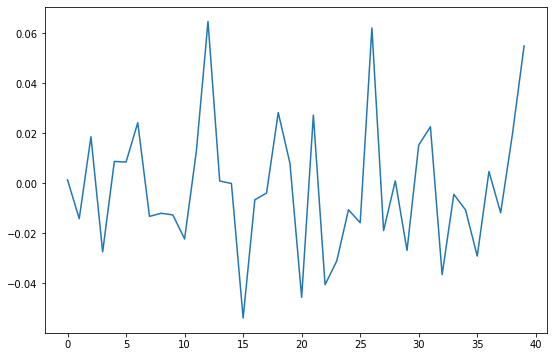

In [46]:
from statsmodels.tsa.stattools import acf

acf_data = acf(hatalar)

plt.figure(figsize=(9,6))
plt.plot(acf_data[1:])
plt.show()

*Modelimizin hataları arasındaki otokorelasyon gerçekten çok düşüktür (-0.04 ile 0.06 arasında).*

**Varsayım 6: özellikler hatalarla korele olmamalıdır**

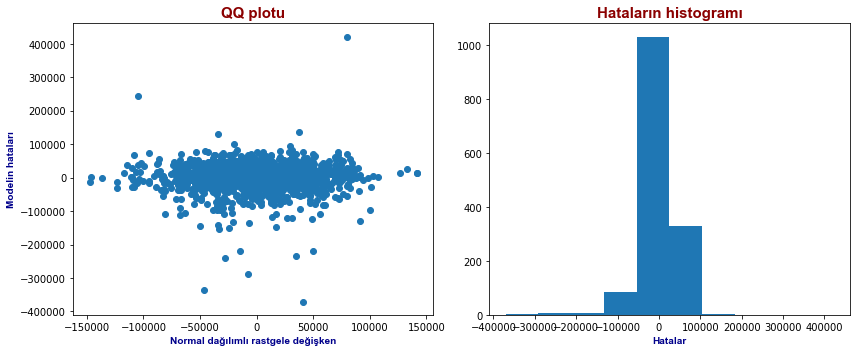

In [47]:
rand_nums = np.random.normal(np.mean(hatalar), np.std(hatalar), len(hatalar))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(rand_nums, hatalar)
plt.xlabel("Normal dağılımlı rastgele değişken", fontdict=eksen_font)
plt.ylabel("Modelin hataları", fontdict=eksen_font)
plt.title("QQ plotu", fontdict=baslik_font)

plt.subplot(1,2,2)
plt.hist(hatalar)
plt.xlabel("Hatalar", fontdict=eksen_font)
plt.title("Hataların histogramı", fontdict=baslik_font)

plt.tight_layout()
plt.show()

In [48]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(hatalar)
norm_stats = normaltest(hatalar)

print("Jarque-Bera test değeri : {0} ve p değeri : {1}".format(jb_stats[0], jb_stats[1]))
print("Normal test değeri      : {0}  ve p değeri : {1:.30f}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test değeri : 20278.056462364722 ve p değeri : 0.0
Normal test değeri      : 530.7747892367952  ve p değeri : 0.000000000000000000000000000000


*Her iki testin p-değerleri, hatalarımızın normal olarak dağılmadığını gösterir.*